# Import Packages

In [43]:
from strava_api import StravaAPI
from data_manager import CleanData,WrangleData, GarminDataManager, MergeData
from statistics import Statistics
import pandas as pd
import time
import config
import plotly.express as px
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Strava Data

In [3]:
# init the api with the access token
strava = StravaAPI()

strava_data_pulls = []
# through trial and error I know I have about 8 pages of data. We could probably automate this but for now this is fine
page_nums = 8
# iterate through each page on strava and request the data
for page_num in range(page_nums):
    strava_data_pulls.append(pd.json_normalize(strava.get_dataset(page_num = page_num + 1)))
    # I don't want to overload my API limits, so I'll give it some time in between requests
    time.sleep(.5)
strava_data = pd.concat(strava_data_pulls, ignore_index = True)

# add to one of the .py at some point
strava_data['datetime'] = pd.to_datetime(strava_data['start_date_local'])
# I am going to store these as strings for now. It might mess up the graphing.
strava_data['date'] = strava_data['datetime'].dt.date.astype(str)
strava_data['year'] = strava_data['datetime'].dt.year.astype(int)
strava_data['month'] = strava_data['datetime'].dt.month.astype(int)
strava_data['hour'] = strava_data['datetime'].dt.hour.astype(int)

# init the statistics class for our str
ss_strava = Statistics(strava_data)



Requesting Token...



,Max Value Type,Max Value,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,...,total_photo_count,has_kudoed,athlete.id,athlete.resource_state,map.id,map.summary_polyline,map.resource_state,average_watts,kilojoules,device_watts
0,resource_state,2,2,Thinking about making some changes,1503.0,495,514,68.0,Run,Run,...,1,False,42779025,1,a10572939478,kupsF|fbaS\?RBNBLFALYd@k@n@Mb@ATVj@Nf@HbABbBKj...,2,NaN,NaN,NaN
1101,distance,93824,2,New shoes,93824.9,6000,6000,0.0,EBikeRide,EBikeRide,...,0,False,42779025,1,a3072204761,,2,NaN,NaN,NaN
1219,moving_time,32708,2,Heart rate data,0.0,32708,32708,0.0,Run,Run,...,0,False,42779025,1,a2888434025,,2,NaN,NaN,NaN
1219,elapsed_time,32708,2,Heart rate data,0.0,32708,32708,0.0,Run,Run,...,0,False,42779025,1,a2888434025,,2,NaN,NaN,NaN
145,total_elevation_gain,890,2,Run/Swim/Run,1775.8,837,837,890.0,Workout,Workout,...,1,False,42779025,1,a7517449121,gaf|FzxbrLLIXIN?h@IB@DILCCABAJBMNACFMDCHMAIGET...,2,NaN,NaN,NaN
37,workout_type,10,2,Rolling,9837.2,1887,2016,119.0,Ride,Ride,...,1,False,42779025,1,a9613046121,ytpsF|ebaSDJDBn@TBJCLOZm@bAIA_@_@e@_@k@SSCkABs...,2,90.7,171.2,False
0,id,-2147483648,2,Thinking about making some changes,1503.0,495,514,68.0,Run,Run,...,1,False,42779025,1,a10572939478,kupsF|fbaS\?RBNBLFALYd@k@n@Mb@ATVj@Nf@HbABbBKj...,2,NaN,NaN,NaN
130,utc_offset,-14400,2,"Not Ed, Not Edd, just Eddie",5130.0,1573,1596,0.0,Run,Run,...,0,False,42779025,1,a7586188107,,2,NaN,NaN,NaN
567,achievement_count,31,2,Morning Run,24155.4,5863,5863,182.1,Run,Run,...,0,False,42779025,1,a4987942740,a`p}FfncxOGm@Do@yAi@]c@oBuEKeBq@mCf@wCz@aAfASZ...,2,NaN,NaN,NaN
487,kudos_count,33,2,Baptismal Waters 💦,3000.0,631,631,0.0,Run,Run,...,1,False,42779025,1,a5220367137,,2,NaN,NaN,NaN


## Load Garmin Data
There are two ways to get your activities from Garmin. The first is signing into your Garmin connect account, clicking your activities on the sidebar, scrolling down for all the activities that you want to select, then clicking export data in the top right corner. The other involves plugging your watch into your computer, copying and pasting the FIT files, then converting them to excel files with Garming SDK. The first option is easiest in my opinion

In [4]:
# read in the data from the csv files in data
# we might need to read every singele file in data then concat them?
file_path = 'data/' 
garmin_data = pd.read_csv(file_path + 'Activities_miles_mena.csv')
# clean the data
garmin_data_clean = CleanData(garmin_data).data
# wrangle the data
garmin_data_wrangle = WrangleData(garmin_data_clean).data
# init the statistics class for garmin data
ss_garmin = Statistics(garmin_data_wrangle)

## Simple Statistics

In [21]:
#ss_garmin.get_max_vals(return_only_max_vals = True)
#ss_garmin.max_vals(return_only_max_vals = False)
#ss_garmin.get_mean_vals()
#ss_garmin.get_std_vals()
#ss_garmin.get_min_vals()
#ss_garmin.get_median_vals()
#ss_garmin.get_kurtosis_vals()
#ss_garmin.get_correlation()
#ss_garmin.get_autocorrelation(7)


# ss_strava.get_max_vals(return_only_max_vals = True)
# ss_strava.get_mean_vals()
# ss_strava.get_std_vals()
# ss_strava.get_min_vals()
# ss_strava.get_max_vals(return_only_max_vals = False)#['comment_count']


{'Distance': 0.22315825105286594,
 'Calories': 0.24971822714088882,
 'Time': 0.11500725767111543,
 'Avg HR': 0.6542290096568928,
 'Max HR': 0.6614877995136339,
 'Avg Pace': 0.2621091318079769,
 'Best Pace': 0.057526430071911126,
 'Total Ascent': 0.15203061110669872,
 'Total Descent': 0.14149149527708807,
 'Avg Stride Length': -0.009557423445734486,
 'Avg Vertical Ratio': nan,
 'Avg Vertical Oscillation': nan,
 'Avg Ground Contact Time': nan,
 'Training Stress Score®': nan,
 'Avg Power': nan,
 'Max Power': nan,
 'Grit': nan,
 'Flow': nan,
 'Avg. Swolf': nan,
 'Avg Stroke Rate': nan,
 'Min Temp': 0.9411359474718929,
 'Best Lap Time': 0.2762855889836433,
 'Number of Laps': 0.22351169735179455,
 'Max Temp': 0.950056552527508,
 'Moving Time': 0.1650180796573693,
 'Elapsed Time': 0.11718529491496597,
 'Min Elevation': 0.7036676705868693,
 'Max Elevation': 0.6788005843868362,
 'Hour': 0.23689175801281992,
 'Minute': 0.008015708110820008,
 'Weekday': -0.1321621210475999}

In [166]:
garmin_data_wrangle.columns#.select_dtypes(include = np.number)#['Distance'].autocorr(7) # method{‘pearson’, ‘kendall’, ‘spearman’}

Index(['Activity Type', 'Date', 'Favorite', 'Title', 'Distance', 'Calories',
       'Time', 'Avg HR', 'Max HR', 'Aerobic TE', 'Avg Run Cadence',
       'Max Run Cadence', 'Avg Pace', 'Best Pace', 'Total Ascent',
       'Total Descent', 'Avg Stride Length', 'Avg Vertical Ratio',
       'Avg Vertical Oscillation', 'Avg Ground Contact Time',
       'Training Stress Score®', 'Avg Power', 'Max Power', 'Grit', 'Flow',
       'Avg. Swolf', 'Avg Stroke Rate', 'Total Reps', 'Dive Time', 'Min Temp',
       'Surface Interval', 'Decompression', 'Best Lap Time', 'Number of Laps',
       'Max Temp', 'Moving Time', 'Elapsed Time', 'Min Elevation',
       'Max Elevation', 'Day', 'Hour', 'Minute', 'Weekday', 'Calendar Date'],
      dtype='object')

## Plotting

In [180]:
import plotly.express as px
import chart_studio.plotly as py

# Run this once. It connects our free chart studio account with our code
#import chart_studio
#chart_studio.tools.set_credentials_file(username=config.plotly_username, api_key=config.plotly_api_key)

### Running Metrics Over Time
We can use the merged data to access the fuller Garmin data with the live strava data. For now we have two seperate processes.
- Garmin Data
- Strava Data

In [185]:
strava_data.columns# ['date']
strava_data]

Index(['resource_state', 'name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'type', 'sport_type', 'workout_type', 'id',
       'start_date', 'start_date_local', 'timezone', 'utc_offset',
       'location_city', 'location_state', 'location_country',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'photo_count', 'trainer', 'commute', 'manual', 'private', 'visibility',
       'flagged', 'gear_id', 'start_latlng', 'end_latlng', 'average_speed',
       'max_speed', 'average_cadence', 'average_temp', 'has_heartrate',
       'average_heartrate', 'max_heartrate', 'heartrate_opt_out',
       'display_hide_heartrate_option', 'elev_high', 'elev_low', 'upload_id',
       'upload_id_str', 'external_id', 'from_accepted_tag', 'pr_count',
       'total_photo_count', 'has_kudoed', 'athlete.id',
       'athlete.resource_state', 'map.id', 'map.summary_polyline',
       'map.resource_state', 'average_watts', 'kilojoules', 'device_watts',
 

In [214]:
from plotting import strava_line_metrics_over_time 
strava_line_metrics_over_time(strava_data)

'https://plotly.com/~miles_mena5280/29/'

In [211]:
strava_cols = ['distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'achievement_count', 'kudos_count', 'comment_count', 
         'average_speed', 'max_speed', 'average_cadence',
       'average_temp', 'average_heartrate', 'max_heartrate', 'elev_high',
       'elev_low', 'pr_count'] + ['datetime']

df = strava_data[strava_data['sport_type'] == 'Run'][strava_cols]

fig = px.line(df, x = 'datetime', y = 'distance', title = '%s Metrics over Time'%('Run')) #, color = 'Weekday')

buttons = []
for column in df.columns:
    if column != 'datetime':
        button = dict(
            label=column,
            method='update',
            args=[{'y': [df[column]]}]
        )
        buttons.append(button)
    
fig.update_layout(yaxis={'title': None, 'showticklabels': True}, margin=dict(l=0, r=0, t=40, b=0),width = 1000, height=400,
                 updatemenus= [
            dict(type = 'dropdown', x = -.02, y = 1, buttons= buttons)]) 
#fig.show()
py.plot(fig, filename = 'strava-line-metrics-over-time', auto_open=False)

'https://plotly.com/~miles_mena5280/29/'

In [209]:
# Running Metrics Over Time
activity_type,var = 'Running', 'Distance'
numeric_cols = ss_garmin.get_numeric().columns

df = garmin_data_wrangle[garmin_data_wrangle['Activity Type'] == 'Running']#.drop('Date', axis = 1).groupby('Calendar Date', as_index=False).sum()

end_range = df[df['Calendar Date'] == '2021-11-29'].index[0]

#fig = px.line(df.iloc[end_range:], x = 'Calendar Date', y = var, title = '%s %s over Time'%(activity_type,var)) #, color = 'Weekday')
fig = px.line(df, x = 'Calendar Date', y = 'Distance', title = '%s Metrics over Time'%(activity_type)) #, color = 'Weekday')

#fig.update_layout(margin=dict(l=0, r=0, t=40, b=0),width = 1100, height=400 )
args = [{'x': [df['Calendar Date']], 'y': [df['Distance']]}]

buttons = []
for column in ss_garmin.get_numeric().columns:
    button = dict(
        label=column,
        method='update',
        args=[{'x': [df['Calendar Date']], 'y': [df[column]]}]
    )
    buttons.append(button)
    
fig.update_layout(yaxis={'title': None, 'showticklabels': True},margin=dict(l=0, r=0, t=40, b=0),width = 1000, height=400,
                 updatemenus= [
            dict(
                type = 'dropdown',
                x = -.02,
                y = 1,
                buttons= buttons
                 
                 )],
                 
         
                 ) 

#fig.update_yaxes(title=None)

py.plot(fig, filename = 'basic-line-distance-over-time', auto_open=False)
#fig.show()

'https://plotly.com/~miles_mena5280/1/'

### Scatter Plot of Strava Data

In [148]:
# 

#strava_corr_col = ['moving_time','distance','comment_count','photo_count','total_elevation_gain','utc_offset','max_speed', 'killojoules' ]
scatter_cols = ['distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'achievement_count',
        'comment_count', 'athlete_count',
        'average_temp', 'average_heartrate',
        'max_heartrate', 'elev_high',
        'pr_count', 'total_photo_count',
       'elev_low']

var, activity_type = strava_corr_col[1], 'Run'

#strava_numeric = ss_strava.get_numeric()
#strava_numeric.corr()['kudos_count']

df = strava_data[strava_data['sport_type'] == activity_type]

fig = px.scatter(df,
                 y = 'kudos_count',
                 x = 'distance',
                 color =  'total_elevation_gain' ,
                 hover_name = 'name', 
        
                ) 

x_buttons = []
for column in scatter_cols: #ss_strava.get_numeric().columns:
    button = dict(
        label=column,
        method='update',
        args=[{ 'x': [df[column]]},
              {'xaxis': {'title': column}}]
    )
    x_buttons.append(button)

color_buttons = []
for column in scatter_cols: #ss_strava.get_numeric().columns:
    button = dict(
        label=column,
        method='update',
        args=[
            {'marker.color': [df[column]], 'coloraxis.colorscale': 'Viridis'},
            {'coloraxis': {'cmin': df[column].min(), 'cmax': df[column].max(),'colorbar': {'title': {'text': column}}}}
        ]
    )
    color_buttons.append(button)

size_buttons = []
for column in scatter_cols: #ss_strava.get_numeric().columns:
    button = dict(
        label=column,
        method='update',
        args=[
            {'marker.size': [df[column]], 'marker.sizemode': 'area', 'marker.sizeref': df[column].max() / 1000 },
        ]
    )
    size_buttons.append(button)

 
    

fig.update_layout(margin=dict(l=0, r=0, t=40, b=0),width = 800, height=400,
            title=dict(text="Factors in Kudos ", x=0.5, y=0.95, xanchor="center", yanchor="top"),
                  
                 updatemenus= [
            dict(
                type = 'dropdown',
                x = -.15,
                y = .99,
                buttons= x_buttons 
                 ),
            dict(
                type = 'dropdown',
                x = -.16,
                y = .79,
                buttons= color_buttons 
                 ),
            dict(
                type = 'dropdown',
                x = -.15,
                y = .59,
                buttons= size_buttons 
                 )],
                  
    annotations=[
        dict(
            text="Select X-Axis:",
            showarrow=False,
            x=-.5,
            y=1,
            xref="paper",
            yref="paper",
            xanchor="left",
            yanchor="bottom",
            font=dict(size=14)
        ),
        dict(
            text="Select Color:",
            showarrow=False,
            x=-.5,
            y=.8,
            xref="paper",
            yref="paper",
            xanchor="left",
            yanchor="bottom",
            font=dict(size=14)
        ),
        dict(
            text="Select Size:",
            showarrow=False,
            x=-.5,
            y=.6,
            xref="paper",
            yref="paper",
            xanchor="left",
            yanchor="bottom",
            font=dict(size=14)
        )
    ]
                 ) 

py.plot(fig, filename = 'scatter-plot-kudos-factors', auto_open=False)

#fig.show()

'https://plotly.com/~miles_mena5280/26/'

In [146]:
#strava_data.dtypes

#strava_numeric = ss_strava.get_numeric()

#strava_numeric.columns[strava_numeric.eq(0).all()]
ss_strava.get_numeric().columns

scatter_cols = ['distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'achievement_count',
        'comment_count', 'athlete_count',
        'average_temp', 'average_heartrate',
        'max_heartrate', 'elev_high',
        'pr_count', 'total_photo_count',
       'elev_low']

Index(['resource_state', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'workout_type', 'id', 'utc_offset',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'photo_count', 'average_speed', 'max_speed', 'average_cadence',
       'average_temp', 'average_heartrate', 'max_heartrate', 'elev_high',
       'elev_low', 'upload_id', 'pr_count', 'total_photo_count', 'athlete.id',
       'athlete.resource_state', 'map.resource_state', 'average_watts',
       'kilojoules'],
      dtype='object')

In [92]:
garmin_numeric.dtypes
#['Distance','Calories','Time','Avg HR','Avg Pace', 'Best Pace','Weekday', 'Minute','Hour','Max Elevation','Min Elevation','Max Temp', 'Total Ascent','Total Descent' ]

Distance                    float64
Calories                      int64
Time                        float64
Avg HR                        int64
Max HR                        int64
Avg Pace                      int64
Best Pace                     int64
Total Ascent                  int64
Total Descent                 int64
Avg Stride Length           float64
Avg Vertical Ratio          float64
Avg Vertical Oscillation    float64
Avg Ground Contact Time       int64
Training Stress Score®      float64
Avg Power                     int64
Max Power                     int64
Grit                        float64
Flow                        float64
Avg. Swolf                    int64
Avg Stroke Rate               int64
Min Temp                    float64
Best Lap Time               float64
Number of Laps                int64
Max Temp                    float64
Moving Time                 float64
Elapsed Time                float64
Min Elevation                 int64
Max Elevation               

## Clustering Runs

1.2698304746686042


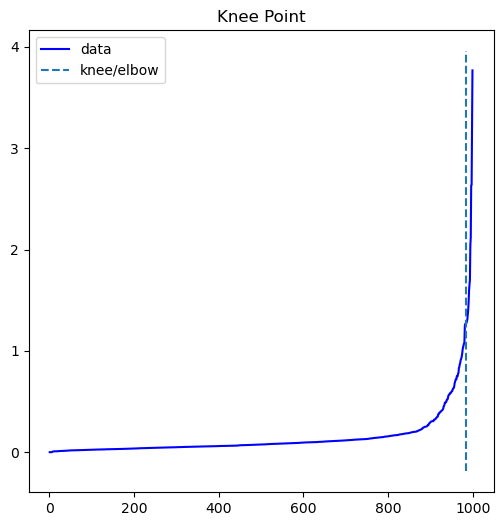

In [163]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN 
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator

# the columns we feed to our model determins the kind of clustering it will acheive
#cols = ['Distance', 'Avg Pace', 'Avg HR']
garmin_cols = ['Distance','Calories','Time','Avg HR','Avg Pace', 'Best Pace','Weekday', 'Minute','Hour','Max Elevation','Min Elevation','Max Temp', 'Total Ascent','Total Descent' ]
cluster_cols = ['Distance','Max Elevation','Avg Pace']
# get only the numeric data
garmin_numeric = ss_garmin.get_numeric()

df = garmin_numeric[cluster_cols]

# scale the data 
df_scaled= StandardScaler().fit_transform(df)

neighbors = NearestNeighbors(n_neighbors=2* df.shape[1]) #minPts recommended to be 2 * dim
neighbors_fit = neighbors.fit(df_scaled)
neigh_dist, neigh_ind  = neighbors_fit.kneighbors(df_scaled)

# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

#kneedle = KneeLocator(x = indices, y = , S = 1.0, curve = "concave", direction = "increasing", online=True)
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = sort_neigh_dist[:,2 * df_scaled.shape[1] - 1], S = 1, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point

pos_eps= kneedle.knee_y
print(pos_elbow)

kneedle.plot_knee()
# Show the plot
plt.show()

In [167]:
clustering_models = [
    ('scaler', StandardScaler()),
    #('kmeans', KMeans(n_clusters=3)),
    ('dbscan', DBSCAN(eps = pos_elbow, min_samples=2*df.shape[1]))  #.5 # pos_elbow comes from the kneedlocator above
    # Add other clustering models as needed
]

# Combine preprocessing steps and clustering models into a pipeline
pipeline = Pipeline(clustering_models) #steps=[('preprocess', preprocessing_steps), ('cluster', clustering_models)])

# Fit the pipeline to your data
pipeline.fit(df)

# Access the clustering results
#kmeans_labels = pipeline.predict(garmin_numeric)
dbscan_labels = pipeline.named_steps['dbscan'].labels_

# We have to put dbscan labels in the dataset for plotyl.
# However, I don't want dbscan labels to be pulled when we call get numeric so I set them as strings.
#df.insert(0,'labels',dbscan_labels)

In [166]:
fig = px.scatter_3d(df, x = cluster_cols[0],  y = cluster_cols[1],  z = cluster_cols[2], color = dbscan_labels) 

x_buttons = []
for column in cluster_cols: #ss_strava.get_numeric().columns:
    button = dict(
        label=column,
        method='update',
        args=[{ 'x': [df[column]]},
              {'xaxis': {'title': column}}]
    )
    x_buttons.append(button)

y_buttons = []
for column in cluster_cols: #ss_strava.get_numeric().columns:
    button = dict(
        label=column,
        method='update',
        args=[{ 'y': [df[column]]},
              {'yaxis': {'title': column}}]
    )
    y_buttons.append(button)

z_buttons = []
for column in cluster_cols: #ss_strava.get_numeric().columns:
    button = dict(
        label=column,
        method='update',
        args=[{ 'z': [df[column]]}]
    )
    z_buttons.append(button)

fig.update_layout(margin=dict(l=0, r=0, t=40, b=0),width = 800, height=400,
            title=dict(text="Factors in Kudos ", x=0.5, y=0.95, xanchor="center", yanchor="top"),
                  
                 updatemenus= [
            dict(type = 'dropdown', x = -.15, y = .99, buttons= x_buttons, showactive = True),
            dict(type = 'dropdown', x = -.16, y = .79, buttons= y_buttons,showactive = True),
            dict(type = 'dropdown', x = -.15, y = .59, buttons= z_buttons,showactive = True)])

fig.show()

## Merging Data Practice

In [44]:
garmin_data_wrangle.columns
#strava_data.columns

Index(['Activity Type', 'Date', 'Favorite', 'Title', 'Distance', 'Calories',
       'Time', 'Avg HR', 'Max HR', 'Aerobic TE', 'Avg Run Cadence',
       'Max Run Cadence', 'Avg Pace', 'Best Pace', 'Total Ascent',
       'Total Descent', 'Avg Stride Length', 'Avg Vertical Ratio',
       'Avg Vertical Oscillation', 'Avg Ground Contact Time',
       'Training Stress Score®', 'Avg Power', 'Max Power', 'Grit', 'Flow',
       'Avg. Swolf', 'Avg Stroke Rate', 'Total Reps', 'Dive Time', 'Min Temp',
       'Surface Interval', 'Decompression', 'Best Lap Time', 'Number of Laps',
       'Max Temp', 'Moving Time', 'Elapsed Time', 'Min Elevation',
       'Max Elevation', 'Day', 'Hour', 'Minute', 'Weekday', 'Calendar Date'],
      dtype='object')

In [54]:
#print(strava_data[ ['date', 'hour']].dtypes)
#garmin_data_wrangle[['Calendar Date', 'Hour']].dtypes
for gcol,scol in zip(garmin_data_wrangle.columns, strava_data.columns):
    print('%-25s %s %-15s'%(gcol, '|' ,scol))

Activity Type             | resource_state 
Date                      | name           
Favorite                  | distance       
Title                     | moving_time    
Distance                  | elapsed_time   
Calories                  | total_elevation_gain
Time                      | type           
Avg HR                    | sport_type     
Max HR                    | workout_type   
Aerobic TE                | id             
Avg Run Cadence           | start_date     
Max Run Cadence           | start_date_local
Avg Pace                  | timezone       
Best Pace                 | utc_offset     
Total Ascent              | location_city  
Total Descent             | location_state 
Avg Stride Length         | location_country
Avg Vertical Ratio        | achievement_count
Avg Vertical Oscillation  | kudos_count    
Avg Ground Contact Time   | comment_count  
Training Stress Score®    | athlete_count  
Avg Power                 | photo_count    
Max Power              

In [66]:
#for gdata,sdata in zip(garmin_data_wrangle['Calendar], strava_data.columns):
 #   print('%-25s %s %-15s'%(gcol, '|' ,scol))
#garmin_data_wrangle[['Calendar Date','Hour']]
#strava_data[['date','hour']]
#strava_data['hour'] - garmin_data_wrangle['Hour']
pd.to_datetime(strava_data['start_date_local']).dt.hour

0       16
1        7
2        8
3       14
4        6
        ..
1433     6
1434     6
1435     7
1436     7
1437     7
Name: start_date_local, Length: 1438, dtype: int32

In [69]:
#garmin_data_wrangle['2024-01-16']
#'2024-01-16' in strava_data['date']
#'2024-01-16' in list(strava_data['date'])
#list(strava_data['date'].astype(str).str.strip())
#list(strava_data['date'].astype(str))
#list(garmin_data_wrangle['Calendar Date'])

data_merge = pd.merge(garmin_data_wrangle, strava_data, left_on = ['Calendar Date', 'Hour'], right_on = ['date', 'hour'], how = 'outer')
# data_merge = pd.merge(garmin_data_wrangle, strava_data, left_on = ['Calendar Date'], right_on = ['date'], how = 'outer')


In [96]:
#data_merge[data_merge['Calendar Date'] == '2024-01-16']
#data_merge
import pint
ureg = pint.UnitRegistry()
data_merge['strava_distance_miles'] = data_merge['distance'] * 0.000621371192237
data_merge['garmin_distance_meters'] = data_merge['Distance'] * 16009.344

data_merge[['Distance','distance','strava_distance_miles','garmin_distance_meters']]


,Distance,distance,strava_distance_miles,garmin_distance_meters
0,0.93,1503.0,0.933921,14888.68992
1,1.01,1630.0,1.012835,16169.43744
2,0.50,811.2,0.504056,8004.67200
3,1.00,1610.9,1.000967,16009.34400
4,0.35,558.7,0.347160,5603.27040
...,...,...,...,...
1688,NaN,10878.8,6.759773,NaN
1689,NaN,10449.3,6.492894,NaN
1690,NaN,9980.3,6.201471,NaN
1691,NaN,9707.6,6.032023,NaN


In [99]:
garmin_data_wrangle.columns

Index(['Activity Type', 'Date', 'Favorite', 'Title', 'Distance', 'Calories',
       'Time', 'Avg HR', 'Max HR', 'Aerobic TE', 'Avg Run Cadence',
       'Max Run Cadence', 'Avg Pace', 'Best Pace', 'Total Ascent',
       'Total Descent', 'Avg Stride Length', 'Avg Vertical Ratio',
       'Avg Vertical Oscillation', 'Avg Ground Contact Time',
       'Training Stress Score®', 'Avg Power', 'Max Power', 'Grit', 'Flow',
       'Avg. Swolf', 'Avg Stroke Rate', 'Total Reps', 'Dive Time', 'Min Temp',
       'Surface Interval', 'Decompression', 'Best Lap Time', 'Number of Laps',
       'Max Temp', 'Moving Time', 'Elapsed Time', 'Min Elevation',
       'Max Elevation', 'Day', 'Hour', 'Minute', 'Weekday', 'Calendar Date'],
      dtype='object')